### Scaling 

🎛 What does “scaling” mean?
Scaling means changing the range of your data so that different features (variables) are on a similar scale.
For example:

You could scale numbers to fit between 0 and 1

Or between -1 and 1

Or even between 0 and 100

🧠 Why do we do this?
Some machine learning algorithms (like:

K-Nearest Neighbors (KNN)

Support Vector Machines (SVM)

Neural Networks

K-Means Clustering

… and others) measure distances between data points to make predictions or create groups.

If one feature (like income in dollars) has values in the thousands and another feature (like age) has values from 0–100, the algorithm will treat differences in income as way more important than differences in age — just because the numbers are bigger.
This is often not what we want.

💰 Example with currencies
Imagine you have product prices:

One column in US Dollars (e.g., $10, $20, $50)

Another in Japanese Yen (e.g., ¥1000, ¥2000, ¥5000)

Because 1 USD ≈ 100 JPY, the Yen numbers look ~100 times larger.
If you run KNN or SVM without scaling, the model might treat a difference of 1 Yen the same as a difference of 1 USD, which doesn’t make sense because 1 Yen is a much smaller amount in real value.

When you scale the data (e.g., normalize to 0–1), both columns get adjusted so the model compares relative differences instead of raw numbers.

📏 What if your features are very different (like height and weight)?
Height might be measured in inches (like 60–80)

Weight might be measured in pounds (like 100–300)

There’s no obvious way to say “how many pounds should equal one inch”
But after scaling, both features will have numbers in roughly the same range (e.g., 0–1).
So, the model will pay roughly equal attention to both when calculating distances.

✅ Summary
Scaling helps:

Put all variables on equal footing

Prevent big numbers from dominating the model

Make algorithms that depend on distances more effective



In [1]:
import pandas as pd
import numpy as np
from scipy import stats

from mlxtend.preprocessing import minmax_scaling

import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)
 

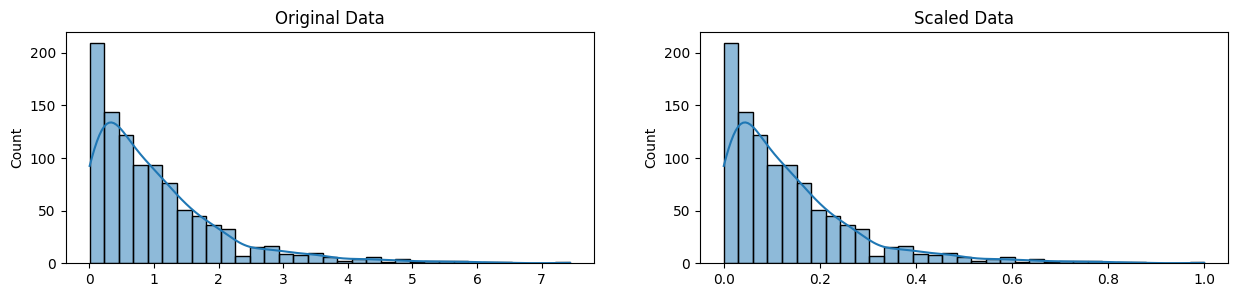

In [3]:
original_data =np.random.exponential(size=1000)
scaled_data = minmax_scaling(original_data,columns =[0])

fig, ax = plt.subplots(1,2,figsize=(15,3))
sns.histplot(original_data, ax=ax[0],kde=True, legend =False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1],kde=True, legend =False)
ax[1].set_title("Scaled Data")
plt.show()

Notice that the shape of the data doesn't change, but that instead of ranging from 0 to 8ish, it now ranges from 0 to 1.

### Normalization

Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.

Normal distribution: Also known as the "bell curve", this is a specific statistical distribution where a roughly equal observations fall above and below the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.

In general, you'll normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

The method we're using to normalize here is called the Box-Cox Transformation. Let's take a quick peek at what normalizing some data looks like:

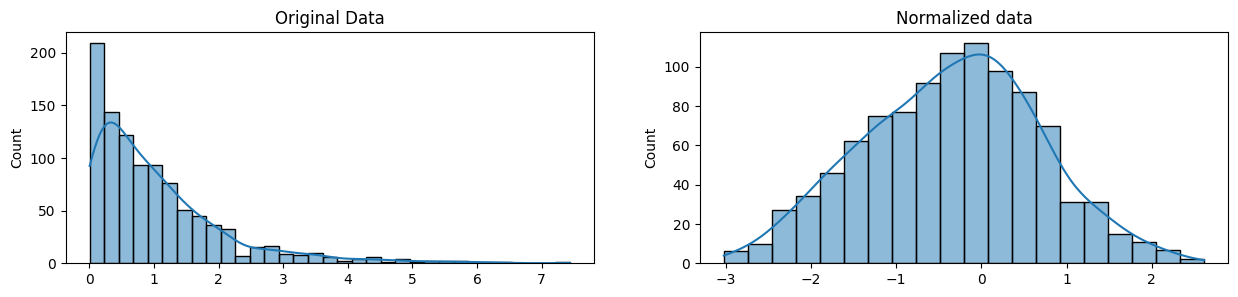

In [4]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

Notice that the shape of our data has changed. Before normalizing it was almost L-shaped. But after normalizing it looks more like the outline of a bell (hence "bell curve").

### Scaling vs. Normalization: What's the difference?¶
One of the reasons that it's easy to get confused between scaling and normalization is because the terms are sometimes used interchangeably and, to make it even more confusing, they are very similar! In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that:

in scaling, you're changing the range of your data, while
in normalization, you're changing the shape of the distribution of your data.
Let's talk a little more in-depth about each of these options.